In [ ]:
# Enter an interactive TensorFlow Session.




# 1. Convolutional layer 구성

# 1) weights/biases 선언 (tf.Variable)

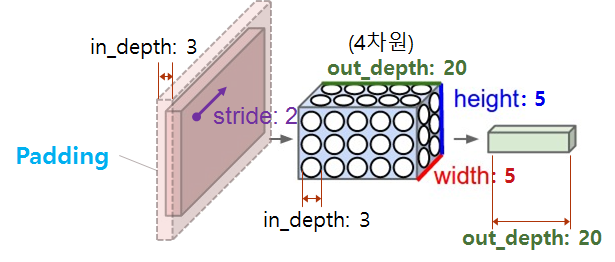

tf.Variable(
    initial_value,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None
)

In [ ]:
# Declare conv weights and biases.




# 2) Conv layer 선언 (tf.nn.conv2d, tf.nn.bias_add)

tf.nn.conv2d(
    input,
    filter,
    strides,
    padding,
    use_cudnn_on_gpu=None,
    data_format=None,
    name=None
)

참조: https://www.tensorflow.org/api_docs/python/tf/nn (API 버전에 유의!)

In [ ]:
# Declare conv layer.




# 3) Activation functions (tf.nn.tanh)
    - tf.sigmoid
    - tf.tanh
    - tf.nn.relu
    
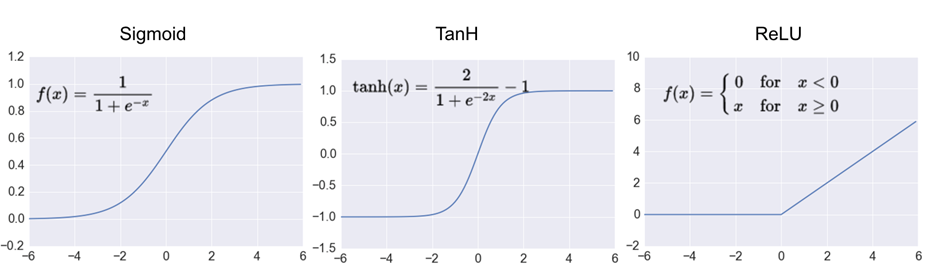

In [ ]:
# Add activation function to conv layer.




# Pooling layer (tf.nn.max_pool)

윈도우 내에서 가장 큰 값만 골라서 다음 feature map을 구성하는 연산
    - Feature map의 크기를 줄임
    - 이동, 변형에 강인한 인식 능력
    - 학습할 자유 패러미터는 없음

In [1]:
"VALID" = without padding:
   inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                  |________________|                dropped
                                 |_________________|
"SAME" = with zero padding:
               pad|                                      |pad
   inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
               |________________|
                              |_________________|
                                             |________________|

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

tf.nn.max_pool(
    value,
    ksize,
    strides,
    padding,
    data_format='NHWC',
    name=None
)

In [ ]:
# Declare pooling layer.

# 3. Fully connected layer

# 0) Flatten 하기 (tf.reshape)

tf.reshape(
    tensor,
    shape,
    name=None
)

In [ ]:
# Reshape tensor into 1 dimension.



# 1) tf.matmul 이용하여 계산하기

tf.matmul(
    a,
    b,
    transpose_a=False,
    transpose_b=False,
    adjoint_a=False,
    adjoint_b=False,
    a_is_sparse=False,
    b_is_sparse=False,
    name=None
)

In [ ]:
# Declare fully connected layer. (Declare weight, biases, activation functions, too.)



# 4. training을 위해서 graph에 loss와 prediction 추가

- loss를 추가한다.

tf.reduce_mean(
    input_tensor,
    axis=None,
    keep_dims=False,
    name=None,
    reduction_indices=None
)

tf.nn.sparse_softmax_cross_entropy_with_logits(
    _sentinel=None,
    labels=None,
    logits=None,
    name=None
)

- prediction도 추가한다.

tf.nn.softmax(
    logits,
    dim=-1,
    name=None
)

- loss에 L2 regularization을 추가해줄 수도 있다.

tf.nn.l2_loss(
    t,
    name=None
)

# 5. 에러율(정확도)의 계산

- sess.run()을 통해서 넘겨받은 값은 numpy array, 보통 그 상태로 계산한다.

In [ ]:
# predictions = sess.run([prediction, ...], ...)
# predictions = [batch, 10]
# labels = [batch, ]



- tensorflow graph에서 mini-batch 단위로 계산하기도 한다.

tf.argmax(
    input,
    axis=None,
    name=None,
    dimension=None,
    output_type=tf.int64
)

tf.equal(
    x,
    y,
    name=None
)

tf.cast(
    x,
    dtype,
    name=None
)

tf.reduce_mean(
    input_tensor,
    axis=None,
    keep_dims=False,
    name=None,
    reduction_indices=None
)

# 6. learning rate와 optimizer

tf.train.exponential_decay(
    learning_rate,
    global_step,
    decay_steps,
    decay_rate,
    staircase=False,
    name=None
)

다양한 decay 함수: https://www.tensorflow.org/api_guides/python/train#Decaying_the_learning_rate

다양한 optimizer 클래스: https://www.tensorflow.org/api_guides/python/train#Optimizers

In [1]:
# learning rate decay




In [2]:
# optimizer
# Use simple sgd for the optimization.
"""
minimize(
    loss,
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)
* loss: A Tensor containing the value to minimize.
* global_step: Optional Variable to increment by one after the variables have been updated.
* var_list: Optional list or tuple of Variable objects to update to minimize loss. Defaults to the list of variables collected in the graph under the key GraphKeys.TRAINABLE_VARIABLES.
"""



# 7. Session 선언하기, training loop 돌리기

참고: https://www.tensorflow.org/api_docs/python/tf/Session